# Kontinuerlige fordelinger

I forrige kapittel så vi på hvordan Scipy kunne hjelpe oss med diskrete fordelinger. Den samme pakken inneholder også tilsvarende funksjonalitet for [kontinuerlige sannsynlighetsfordelinger](https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html#continuous-distributions). Vi skal se på noen av dem her.

## Normalfordelingen
Da vi så på diskrete fordelinger brukte vi PDF-funksjonen for å finne sannsynligheter for de diskrete verdiene. Med kontinuerlige fordelinger, er ikke dette noen god løsning. Sannsynligheten for enhver verdi i en kontinuerlig fordelinger 0, og det vi egentlig er ute etter, er arealet under grafen som fordelingen danner. For å slippe integrasjon, bruker vi derfor den kumulative funksjonen, CDF (Cumulative Distribution Function).

#### Eksempel:
Finn $\Phi(1.23)$


In [1]:
from scipy.stats import norm

norm.cdf(1.23)

0.89065144757430814

#### Eksempel:

Gitt $X \tilde {} N_{(3, 2)}$

Hva er sannsynligheten for at X er mindre enn 3.82?

In [2]:
norm.cdf(3.82, 3, 2)

0.65909702622767741

CDF finner arealet under grafen fra $-\inf$ og opp til X (første parameter, altså 3.82 i forrige eksempel). Hvis vi vil finne sannsynligheten for at verdien faller innenfor et intervall, regner vi ut for begge ender av intervallet, og trekker fra.

#### Eksempel
Gitt $X \tilde {} N_{(1.5, 1.75)}$

Hva er sannsynligheten for at X er mellom 1 og 2?

In [3]:
a = 1
b = 2

norm.cdf(b, 1.5, 1.75) - norm.cdf(a, 1.5, 1.75)

0.22490303780401533

Her ser du at vi gjentar $\sigma$ og $\mu$ i begge uttrykkene. Hvis vi har en fordeling vi ønsker å bruke flere ganger, kan vi lagre denne i en variabel. Vi lager da $N_{(\sigma, \mu)}$ ved at vi spesifiserer disse to direkte til "norm", og får en fordeling som vi kan ta vare på. Deretter trenger vi kun legge inn X i CDF-funksjonen. Dette kan spare oss for litt skriving:

In [4]:
min_fordeling = norm(1.5, 1.75)

min_fordeling.cdf(b) - min_fordeling.cdf(a)

0.22490303780401533

### Invers kumulativ fordeling

Invers er tilgjengelig ved hjelp av PPF-funksjonen (Percent Point Function). Denne kan vi bruke direkte på "norm", som vi har gjort med CDF og PDF tidligere. Vi kan også bruke den på våre egne varianter av fordelingene, slik som "min_fordeling" over. Prøv å bytte ut "norm" med "min_fordeling", her:

In [5]:
norm.ppf(0.05)

-1.6448536269514729

### Normaltilnærmingen

Normaltilnærming for både diskrete og kontinuerlige stokastiske variable kan vi finne ved å bruke de samme funksjonene som tidligere, og setter inn hhv. $\mu=\mu x - \frac{1}{2}$ og $\sigma=\sigma x$, eller $\mu=\mu x$ og $\sigma = \sigma x$ slik vi er vant med.

#### Eksempel

In [6]:
u = 4.7
sigma = 2.8
a = 3
b = 6

# Diskret
ford_d = norm(u-0.5, sigma) # Vi trekker fra 1/2 her.
print(ford_d.cdf(b) - ford_d.cdf(a))

# Kontinuerlig
ford_k = norm(u, sigma)
print(ford_k.cdf(b) - ford_k.cdf(a))

0.405724028849
0.406900415875


### Graf
De fleste kjenner igjen normalfordelingskurven når de ser den. Men la oss tegne en graf likevel. Vi importerer matplotlib og DataFrame fra Pandas, slik vi har gjort før. Vi importerer også numpy, som forkortelsen np. Deretter bruker vi numpy sin "linspace" for å lage en jevnt fordelt liste med tall fra -4 til 4 på 50 elementer. Vi kunne også brukt "range"-funksjonen som vi har sett før, men da måtte vi selv funnet mellomrommet mellom hver verdi. Linspace tar inn parametere for miste verdi, største verdi, og antall oppdelinger.

Videre lager vi en dataframe, og bruker normalfordelingens PDF-funksjon på elementene i x. For å få riktige indekser på X-aksen spesifiserer vi at vi ønsker x som "index"-parameter i DataFramen vår. Til slutt plotter vi den med "line"-plotteren.

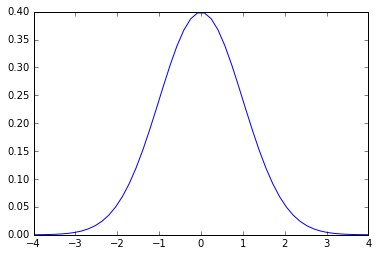

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np

x = np.linspace(-4, 4, 50) # Finn 50 jevnt fordelte verdier mellom -4 og 4.
df = DataFrame(norm.pdf(x), index=x) # For hver verdi i x, regn ut tilhørende PDF-verdi,
# og bruk x som indekser på X-aksen.

df.plot.line(legend=None)
plt.show()

Nå kan vi lage en tilsvarende figur for den kumulative varianten. Siden vi allerede har laget x-variabelen, og importert de funksjonene vi trenger, gjenbruker vi dette, og koden blir mye kortere:

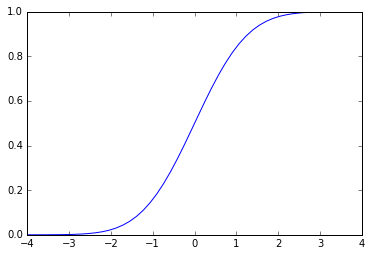

In [8]:
df2 = DataFrame(norm.cdf(x), x) # Gjenbruker x-ene mellom -4 og 4, og bruker disse til å finne tilhørende CDF
# (kumulativ)

df2.plot.line(legend=None)
plt.show()